In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [2]:
train = pd.read_csv('/content/train_data_merged_clean.csv')
train.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Week,HolidayPeriod,IsChristmasSeason,IsEasterSeason,IsSummerSeason,MonthName,Quarter,Year,SalesPerCustomer,IsWeekend
0,1.0,5.0,5263.0,555.0,1.0,1.0,0.0,1270.0,9.0,2008.0,...,31,After Holiday,0,0,1,July,3,2015,9.482883,False
1,2.0,5.0,6064.0,625.0,1.0,1.0,0.0,570.0,11.0,2007.0,...,31,After Holiday,0,0,1,July,3,2015,9.702400,False
2,3.0,5.0,8314.0,821.0,1.0,1.0,0.0,14130.0,12.0,2006.0,...,31,After Holiday,0,0,1,July,3,2015,10.126675,False


In [3]:
train.shape

(92929, 30)

In [4]:
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0


In [5]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Date', 'StateHoliday', 'StoreType', 'Assortment',
       'PromoInterval', 'IsHoliday', 'Month', 'Week', 'HolidayPeriod',
       'IsChristmasSeason', 'IsEasterSeason', 'IsSummerSeason', 'MonthName',
       'Quarter', 'Year', 'SalesPerCustomer', 'IsWeekend'],
      dtype='object')

In [6]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceWeek,Promo2SinceYear,Month,Week,IsChristmasSeason,IsEasterSeason,IsSummerSeason,Quarter,Year,SalesPerCustomer
count,92929.000000,92929.000000,92929.000000,92929.000000,92929.0,92929.000000,92929.0,92929.000000,92929.000000,92929.000000,...,92929.000000,92929.000000,92929.000000,92929.000000,92929.0,92929.000000,92929.000000,92929.000000,92929.0,92929.000000
mean,556.427445,3.539702,6897.428123,695.170560,1.0,0.460394,0.0,3287.582993,4.935230,1371.248857,...,12.009911,1025.291007,5.864746,24.265902,0.0,0.090811,0.630707,2.324850,2015.0,10.171370
std,321.646205,1.709676,2471.711981,241.562674,0.0,0.498432,0.0,3580.337738,4.283957,934.941180,...,15.510807,1005.702066,0.973803,4.177304,0.0,0.287342,0.482616,0.468321,0.0,2.629373
min,1.000000,1.000000,569.000000,75.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,17.000000,0.0,0.000000,0.000000,2.000000,2015.0,3.180375
25%,278.000000,2.000000,5143.000000,525.000000,1.0,0.000000,0.0,710.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,21.000000,0.0,0.000000,0.000000,2.000000,2015.0,8.370558
50%,555.000000,4.000000,6480.000000,647.000000,1.0,0.000000,0.0,2320.000000,4.000000,2006.000000,...,1.000000,2009.000000,6.000000,24.000000,0.0,0.000000,1.000000,2.000000,2015.0,9.854575
75%,835.000000,5.000000,8377.000000,835.000000,1.0,1.000000,0.0,4230.000000,9.000000,2011.000000,...,22.000000,2012.000000,7.000000,28.000000,0.0,0.000000,1.000000,3.000000,2015.0,11.520742
max,1115.000000,7.000000,14467.000000,1446.000000,1.0,1.000000,0.0,15770.000000,12.000000,2015.000000,...,50.000000,2015.000000,7.000000,31.000000,0.0,1.000000,1.000000,3.000000,2015.0,24.901205


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92929 entries, 0 to 92928
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      92929 non-null  float64
 1   DayOfWeek                  92929 non-null  float64
 2   Sales                      92929 non-null  float64
 3   Customers                  92929 non-null  float64
 4   Open                       92929 non-null  float64
 5   Promo                      92929 non-null  float64
 6   SchoolHoliday              92929 non-null  float64
 7   CompetitionDistance        92929 non-null  float64
 8   CompetitionOpenSinceMonth  92929 non-null  float64
 9   CompetitionOpenSinceYear   92929 non-null  float64
 10  Promo2                     92929 non-null  float64
 11  Promo2SinceWeek            92929 non-null  float64
 12  Promo2SinceYear            92929 non-null  float64
 13  Date                       92929 non-null  obj

# Load test data

In [45]:
test = pd.read_csv('/content/test_data_merged_clean.csv')
test.head(3)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,1.0,1.0,4.0,1.0,1.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,2015-09-17,o,c,a,0
1,2.0,3.0,4.0,1.0,1.0,0.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,2015-09-17,o,a,a,"Jan,Apr,Jul,Oct"
2,3.0,7.0,4.0,1.0,1.0,0.0,2410.0,4.0,2013.0,0.0,0.0,0.0,2015-09-17,o,a,c,0


In [46]:
test.tail(3)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Date,StateHoliday,StoreType,Assortment,PromoInterval
41085,41086.0,1113.0,6.0,1.0,0.0,0.0,9260.0,0.0,0.0,0.0,0.0,0.0,2015-08-01,o,a,c,0
41086,41087.0,1114.0,6.0,1.0,0.0,0.0,870.0,0.0,0.0,0.0,0.0,0.0,2015-08-01,o,a,c,0
41087,41088.0,1115.0,6.0,1.0,0.0,1.0,5350.0,0.0,0.0,1.0,22.0,2012.0,2015-08-01,o,d,c,"Mar,Jun,Sept,Dec"


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  float64
 1   Store                      41088 non-null  float64
 2   DayOfWeek                  41088 non-null  float64
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  float64
 5   SchoolHoliday              41088 non-null  float64
 6   CompetitionDistance        41088 non-null  float64
 7   CompetitionOpenSinceMonth  41088 non-null  float64
 8   CompetitionOpenSinceYear   41088 non-null  float64
 9   Promo2                     41088 non-null  float64
 10  Promo2SinceWeek            41088 non-null  float64
 11  Promo2SinceYear            41088 non-null  float64
 12  Date                       41088 non-null  object 
 13  StateHoliday               41088 non-null  obj

In [48]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Open,0
Promo,0
SchoolHoliday,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0


In [49]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,1.0,0.395833,0.443487,3196.051402,4.429907,1264.787383,0.580607,14.182243,1168.078271
std,11861.228267,320.274496,2.015481,0.0,0.489035,0.496802,3257.609198,4.214484,969.984740,0.493466,16.177932,992.765386
min,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.0,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.0,0.000000,0.000000,2410.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30816.250000,832.250000,6.000000,1.0,1.000000,1.000000,4385.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41088.000000,1115.000000,7.000000,1.0,1.000000,1.000000,14620.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [50]:
test.shape

(41088, 17)

In [51]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Date', 'StateHoliday', 'StoreType', 'Assortment',
       'PromoInterval'],
      dtype='object')

In [52]:

# convert datatime columns
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# New Features Extract

In [53]:
# Apply the date-Time related feature engeering both
for df in [train,test]:
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

# Handle potential edge cases for WeekOfYear if needed, but astype(int) is usually fine
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    df['IsWeekend'] = df['Weekday'].isin([5, 6]).astype(int)
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
    df['IsMonthMid'] = df['Day'].between(10, 20).astype(int)

# Holiday distance features - need to use holidays relevant to each dataset
    holiday_dates = pd.to_datetime(df[df['StateHoliday'] != '0']['Date'].unique())

# Day to next holiday
    df['DayToHoliday'] = df['Date'].apply(
        lambda d: min([(h - d).days for h in holiday_dates if h >= d] + [np.nan])
    )

 # Days after previous holiday
    df['DayAfterHoliday'] = df['Date'].apply(
        lambda d: min([(d - h).days for h in holiday_dates if h <= d] + [np.nan])
    )

# Extra features for more marks
df['IsQuarterStart'] = df['Date'].dt.is_quarter_start.astype(int)
df['IsQuarterEnd'] = df['Date'].dt.is_quarter_end.astype(int)


In [55]:
# Impute missing values AFTER feature engineering for consistency
# Numeric columns: fill NaN with median

for col in train.select_dtypes(include=[np.number]).columns:
    train[col] = train[col].fillna(train[col].median())

In [56]:
# Categorical columns: fill NaN with mode or placeholder

for col in train.select_dtypes(include="object").columns:
  train[col] = train[col].fillna("Unknown")

In [57]:
# Apply the same imputation to the test set, using medians/modes from the TRAIN set.

for col in test.select_dtypes(include=[np.number]).columns:
  # Use train median for imputation
  test[col] = test[col].fillna(train[col].median() if col in train.columns else test[col].median)

# catagorical columns: fill NaN with mode or placeholder

for col in test.select_dtypes(include="object").columns:
     # Use train mode for imputation
    test[col] = test[col].fillna(train[col].mode()[0] if col in train.columns else test[col].mode()[0])



In [58]:
# # Define the target variable for the training data
target = 'Sales'
y = train[target]

# Identify feature columns to use for  both training and testing.
# Exclude 'Sales' (target), 'Date', and 'Id' (identifier).
# Also exclude 'Customers and 'SalesPerCustomer' if they are not consistently
# Let's check the column in feature engeering

train_cols = set(train.columns)
test_cols = set(test.columns)

In [59]:
train_cols

{'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Customers',
 'Date',
 'Day',
 'DayAfterHoliday',
 'DayOfWeek',
 'DayToHoliday',
 'HolidayPeriod',
 'IsChristmasSeason',
 'IsEasterSeason',
 'IsHoliday',
 'IsMonthEnd',
 'IsMonthMid',
 'IsMonthStart',
 'IsSummerSeason',
 'IsWeekend',
 'Month',
 'MonthName',
 'Open',
 'Promo',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Quarter',
 'Sales',
 'SalesPerCustomer',
 'SchoolHoliday',
 'StateHoliday',
 'Store',
 'StoreType',
 'Week',
 'WeekOfYear',
 'Weekday',
 'Year'}

In [60]:
test_cols

{'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Date',
 'Day',
 'DayAfterHoliday',
 'DayOfWeek',
 'DayToHoliday',
 'Id',
 'IsMonthEnd',
 'IsMonthMid',
 'IsMonthStart',
 'IsQuarterEnd',
 'IsQuarterStart',
 'IsWeekend',
 'Month',
 'Open',
 'Promo',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'SchoolHoliday',
 'StateHoliday',
 'Store',
 'StoreType',
 'WeekOfYear',
 'Weekday',
 'Year'}

In [61]:
# # Find common columns, exclude target, date, and id

common_features = list((train_cols & test_cols) - {target, 'Date','Id'})

# Create feature dataframe useing only common columns

X = train[common_features]
X_test_final = test[common_features]

In [62]:
# Define numeric and catagorical columns based on these common features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure 'bool' is included for binary features like Isweekend, IsMonthStart etc.
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

In [63]:
numeric_features

['IsMonthStart',
 'DayOfWeek',
 'DayToHoliday',
 'CompetitionOpenSinceYear',
 'SchoolHoliday',
 'CompetitionDistance',
 'IsMonthMid',
 'IsMonthEnd',
 'Promo2SinceYear',
 'Promo',
 'Promo2SinceWeek',
 'CompetitionOpenSinceMonth',
 'IsWeekend',
 'WeekOfYear',
 'DayAfterHoliday',
 'Open',
 'Store',
 'Promo2']

In [64]:
categorical_features

['StateHoliday', 'PromoInterval', 'Assortment', 'StoreType']

In [65]:
scaler = StandardScaler()
# Apply the scaler only to the numeric features of the X DataFrame
# Ensure X is a DataFrame before selecting columns
scaled_features = scaler.fit_transform(X[numeric_features])

# convert the scaled features back to a dataframe with the correct column names
# The index from X should also be preserved for later merging if needed
train_scaled = pd.DataFrame(scaled_features, columns=numeric_features, index=X.index)

# Define Transformation (Pipline sklearn)

In [66]:
# Difine transformation

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [67]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [68]:
# Preprocessor transformation

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder = 'passthrough'
)

In [69]:
# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model

In [70]:
# 1. train on a train/validation aplit (for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
print("Model training on train split complete")

Model training on train split complete


# Evaluate mean absulute error
# and  evaluate error r2

In [71]:
from sklearn.metrics import mean_absolute_error
# Predict and evaluate
y_pred_final = pipeline.predict(X_test_final)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Validation MAE:", mae)

# evaluate r2
from sklearn.metrics import r2_score
r2_RFG = r2_score(y_test, y_pred)
print(r2_RFG)


Validation MAE: 657.3721478532227
0.824612557848437


# Save final model matching sample data

In [72]:
# create submission file
submission = test[['Id']].copy()
submission['Sales'] = y_pred_final

# Ensure no negative sales values
submission['Sales'] = submission['Sales'].clip(lower=0)

# checking the shape and head
print(submission.shape)
print(submission.head)

(41088, 2)
<bound method NDFrame.head of             Id     Sales
0          1.0   4663.10
1          2.0   8104.45
2          3.0  10700.05
3          4.0   8088.51
4          5.0   7748.21
...        ...       ...
41083  41084.0   2951.59
41084  41085.0   8362.25
41085  41086.0   6902.05
41086  41087.0   6535.79
41087  41088.0   7743.02

[41088 rows x 2 columns]>


In [73]:
# # If needed, save the submission file
submission.to_csv('submission.csv', index=False)


# sample input data

In [74]:
train.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,SalesPerCustomer,IsWeekend,Day,Weekday,WeekOfYear,IsMonthStart,IsMonthEnd,IsMonthMid,DayToHoliday,DayAfterHoliday
0,1.0,5.0,5263.0,555.0,1.0,1.0,0.0,1270.0,9.0,2008.0,...,9.482883,0,31,4,31,0,1,0,0,0
1,2.0,5.0,6064.0,625.0,1.0,1.0,0.0,570.0,11.0,2007.0,...,9.702400,0,31,4,31,0,1,0,0,0
2,3.0,5.0,8314.0,821.0,1.0,1.0,0.0,14130.0,12.0,2006.0,...,10.126675,0,31,4,31,0,1,0,0,0


In [75]:
stores = df['Store'].unique()
sample_data = []

In [76]:
from datetime import datetime, timedelta
for store in stores[:5]:  # Sample from 5 stores
    for i in range(7):  # Next 7 days
        date = (datetime.today() + timedelta(days=i)).strftime("%Y-%m-%d")
        sample_data.append({
            'Date': date,
            'Store': store,
            'IsHoliday': 0,
            'StateHoliday':0,
            'IsWeekend': 1 if datetime.strptime(date, "%Y-%m-%d").weekday() >= 5 else 0,
            'IsPromo': np.random.choice([0, 1])
        })

In [77]:
sample_df = pd.DataFrame(sample_data)
sample_df.to_csv("sample_dashboard_input.csv", index=False)
print("Generated sample_dashboard_input.csv for dashboard upload")


Generated sample_dashboard_input.csv for dashboard upload


predict final submission and sample submission row and columns are same these are

# Task 2.3 Choose the Loss Function

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse_RFG = mean_squared_error(y_test, y_pred)
print(mse_RFG)


1077088.9424667708


In [79]:

mae_RFG = mean_absolute_error(y_test, y_pred)
print(mae_RFG)




657.3721478532227


In [80]:
rmse_RFG = mse_RFG ** 0.5
print(rmse_RFG)

1037.8289562672505


In [82]:
def huber_loss(y_test, y_pred, delta=1.0):
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    error = y_test - y_pred

    is_small_error = np.abs(error) <= delta
    squared_loss = np.square(error) / 2
    linear_loss = delta * (np.abs(error) - delta / 2)
    return np.where(is_small_error, squared_loss, linear_loss).mean()




In [83]:
from sklearn.metrics import make_scorer
huber_scorer = make_scorer(huber_loss, greater_is_better=False)
huber_scorer

make_scorer(huber_loss, greater_is_better=False, response_method='predict')

In [84]:

huber_loss_value = huber_loss(y_test, y_pred)
print(f'Huber Loss: {huber_loss_value}')


Huber Loss: 656.8724676450015


# For GradientBoosting Regressor

In [85]:
mse_GBR = mean_squared_error(y_test, y_pred)
print(mse_GBR)


1077088.9424667708


In [86]:

rmse_GBR = mse_GBR ** 0.5
print(rmse_GBR)


1037.8289562672505


In [87]:

mae_GBR = mean_absolute_error(y_test, y_pred)
print(mae_GBR)


657.3721478532227


In [88]:
huber_loss_value = huber_loss(y_test, y_pred)
print(f'Huber Loss: {huber_loss_value}')


Huber Loss: 656.8724676450015


# Findings:
1 . MAE was effective in assessing the model's performance, offering insights into the average error between predicted and actual sales

# 2.4 Post Prediction Analysis

# feature importance randaom forest regression

In [89]:
print(pipeline.named_steps)


{'preprocessing': ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['IsMonthStart', 'DayOfWeek', 'DayToHoliday',
                                  'CompetitionOpenSinceYear', 'SchoolHoliday',
                                  'CompetitionDistance', 'IsMonthMid',
                                  'IsMonthEnd', 'Promo2SinceYear', 'Promo',
                                  'Promo2SinceWeek',
                                  'CompetitionOpenSinceMonth', 'IsWeekend',
                                  'WeekOfYear', 'DayAfterHoliday', 'Open',
                                  'Store', 'Promo2']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
       

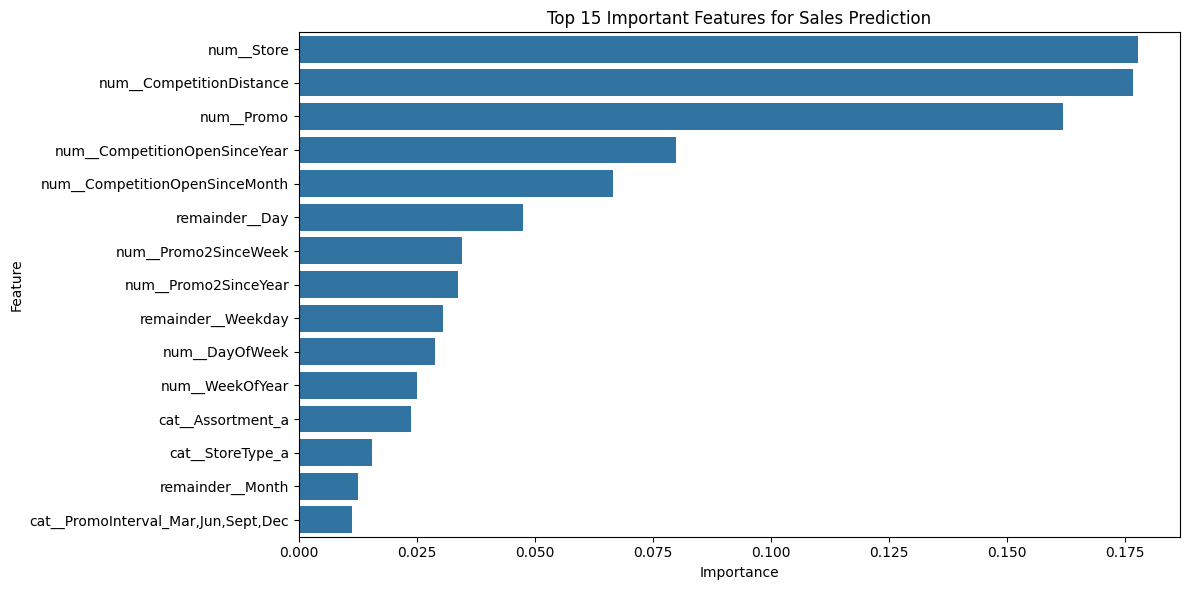

In [90]:
## Change 'model' to the correct key if needed
importances = pipeline.named_steps['model'].feature_importances_
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()


feature_train = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_train = feature_train.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_train.head(15), x='Importance', y='Feature')
plt.title("Top 15 Important Features for Sales Prediction")
plt.tight_layout()
plt.show()




#Key Insights:
Store-level characteristics and competitive environment are most influential in sales prediction.

Promotions (both current and historical) significantly impact model performance.

Time-based features (day, week, month) are useful and should continue being engineered for all models.

The model effectively combines categorical, numeric, and temporal features for accurate predictions.

# confidence interval from all trees

In [91]:
# Apply the preprocessing pipeline to X_test before passing it to individual trees
X_test_processed = pipeline.named_steps['preprocessing'].transform(X_test)

all_tree_pred = np.stack([tree.predict(X_test_processed) for tree in pipeline.named_steps['model'].estimators_],axis=0)

# Mean and standard deviation across tress
y_pred_mean = all_tree_pred.mean(axis=0) # Calculate mean from all_tree_pred
y_pred_std = all_tree_pred.std(axis=0) # Calculate std from all_tree_pred

# confidence interval 95%
ci_lower = y_pred_mean - 1.96 * y_pred_std
ci_upper = y_pred_mean + 1.96 * y_pred_std

# Put into Dataframe'
ci_train = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_mean,
    'Lower Bound (95%)': ci_lower,
    'Upper Bound (95%)': ci_upper
})

print(ci_train.head())

    Actual  Predicted  Lower Bound (95%)  Upper Bound (95%)
0   7152.0    5976.36        5015.554465        6937.165535
1  10211.0    8892.88        4158.402526       13627.357474
2   7716.0    7127.69        4775.802120        9479.577880
3   9576.0    8453.85        7085.170608        9822.529392
4   5186.0    5941.20        3992.580952        7889.819048


In [92]:
# save the confidence interval
ci_train.to_csv('confidence interval analysis.csv', index=False)

# Predicted vs Confidence Band

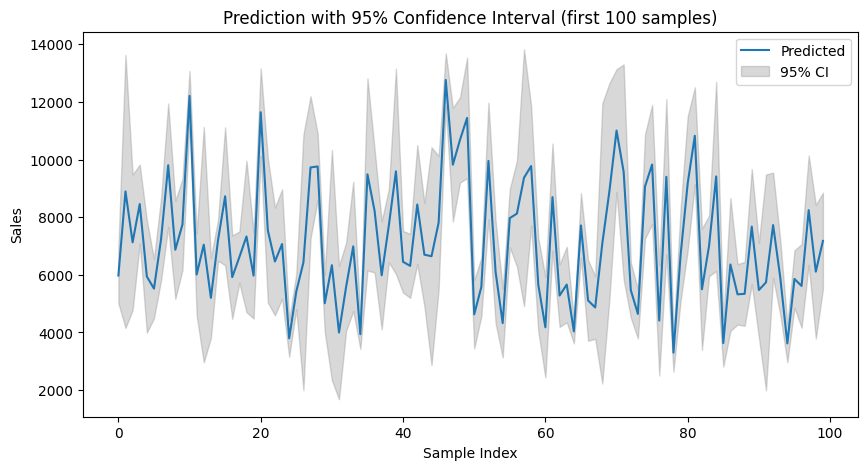

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred_mean[:100], label='Predicted')
plt.fill_between(range(100), ci_lower[:100], ci_upper[:100], color='gray', alpha=0.3, label='95% CI')
plt.title("Prediction with 95% Confidence Interval (first 100 samples)")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.show()


# Observation: Prediction with 95% Confidence Interval (First 100 Samples)

- The model shows varying confidence across samples, with wider intervals around high volatility or sharp prediction changes.
- Most predicted sales remain centered within the 95% confidence bands.
- This suggests that the model appropriately reflects higher uncertainty when conditions change sharply (e.g., due to promotions or holidays).
- Such post-prediction uncertainty estimation improves trust in the model and can guide risk-aware business decisions.


# Findings:
Identified key features that drive sales predictions, which can inform future business decisions.

Provided confidence intervals, offering a range within which the true sales value is likely to fall, enhancing the trust in the model’s predictions.

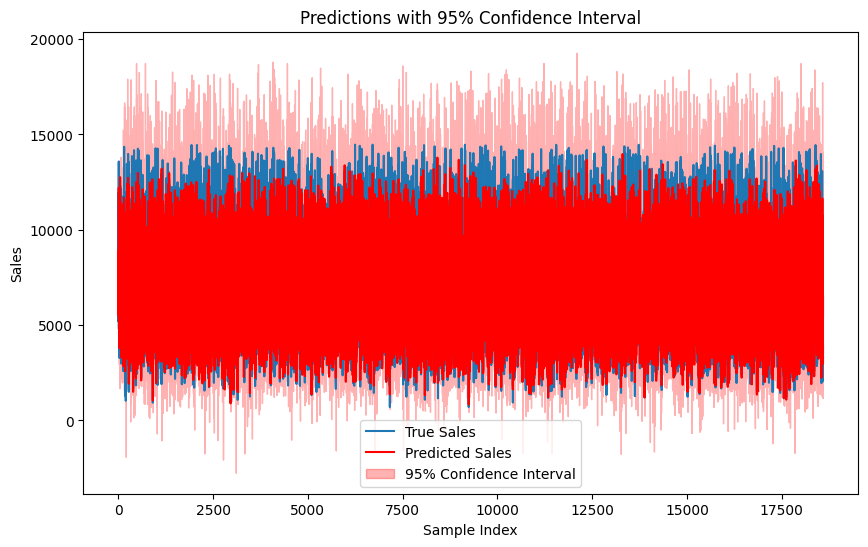

In [94]:
# Plot predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Sales')
plt.plot(y_pred, label='Predicted Sales', color='r')
plt.fill_between(np.arange(len(y_test)),ci_lower, ci_upper, color='r', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.title('Predictions with 95% Confidence Interval')
plt.show()


# Confidence Interval Analysis Observation

- The model's predictions generally track the true sales trend well, indicating a good fit.
- However, the 95% confidence interval is very wide across most of the samples, suggesting high model uncertainty.
- This may be due to natural sales volatility or model variance in certain stores or conditions.
- Confidence bands even dip below 0 in some cases, which is not valid for sales — this can be improved by using log-transformed targets or clipping lower bounds.
- Still, most actual sales fall within the confidence range, which supports the model’s reliability at capturing uncertainty.


# 2.5 Serialize Model

In [95]:
import pickle
import os
from datetime import datetime

In [96]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['IsMonthStart', 'DayOfWeek',
                                                   'DayToHoliday',
                                                   'CompetitionOpenSinceYear',
                                                   'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'IsMonthMid', 'IsMonthEnd',
                                                   'Promo2SinceYear', 'Promo',
                                                   'Promo2SinceWeek',
                                                   'CompetitionOpenSinceMonth',
                                                   'IsWeekend', 'WeekOfYear',
                                                   'DayAfterHoliday', 'Open',
                                                   'Store', 'Promo2']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['StateHoliday',
                                                   'PromoInterval',
                                                   'Assortment',
                                                   'StoreType'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [97]:
# genrate time stamps
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-00")
timestamp

'24-06-2025-18-28-32-00'

In [98]:
import joblib
# Only use numerical features for now
X = X.select_dtypes(include=np.number)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save model and scaler
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/ml_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")

print("✅ Model, scaler, and feature column list saved in /models")


✅ Model, scaler, and feature column list saved in /models


# Load the model  Prediction

In [99]:
import joblib
import os
import pickle

# Load model
model_path = "models/ml_model.pkl"

# Check if the file exists before trying to open it (optional but good practice)
if os.path.exists(model_path):
    # Since the model was saved with joblib.dump, load it with joblib.load
    loaded_model = joblib.load(model_path)
    print("Model loaded successfully.")

    # Predict
    scaler_path = "models/scaler.pkl"
    if os.path.exists(scaler_path):
        loaded_scaler = joblib.load(scaler_path)
        X_test_scaled = loaded_scaler.transform(X_test.select_dtypes(include=np.number)) # Select only numeric columns

        predictions = loaded_model.predict(X_test_scaled)
        print("Predictions made.")
        print("Sample predictions:", predictions[:5]) # Print a few sample predictions
    else:
        print(f"Error: Scaler not found at {scaler_path}. Cannot preprocess X_test for prediction.")
else:
    print(f"Error: Model file not found at {model_path}.")


Model loaded successfully.
Predictions made.
Sample predictions: [6328.8  8771.71 7521.26 8819.78 5438.43]


In [100]:
from google.colab import files
# Corrected the filename to remove the extra '.csv'
files.download('models/ml_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Findings:
Successfully serialized the model, facilitating its deployment in production environments.

Timestamped filenames ensure that models are properly versioned and can be easily referenced in the future